In [2]:
from ultralytics import YOLO
import os
import shutil
import cv2
from IPython.display import Image, display
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

if torch.cuda.is_available():
    print('Using GPU for inference')
else:
    print('Using CPU for inference')

Using GPU for inference


In [3]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.current_device())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

CUDA available: True
CUDA version: 11.8
Number of GPUs: 1
Current GPU: 0
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [4]:
model = YOLO('yolov8m.pt')

In [ ]:
results = model.train(
    data='../Acne2/data.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    workers=4,
    project='yolo_acne',
    name='acne_model'
)

In [ ]:
model = YOLO('best1.pt')


image 1/1 C:\Users\parth\Downloads\66.png: 576x640 8 acnes, 189.0ms
Speed: 41.3ms preprocess, 189.0ms inference, 253.2ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs\detect\predict4


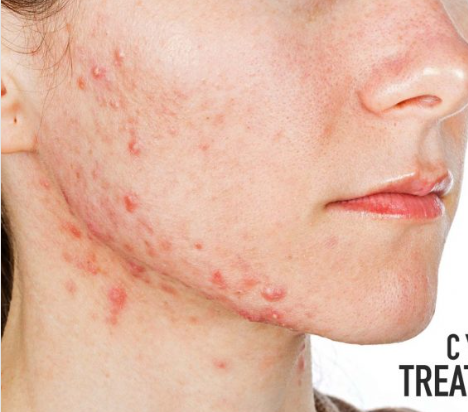

In [6]:
test_image = "C:/Users/parth/Downloads/66.png"  # Change this to the path of the test image

# Perform inference
result = model.predict(source=test_image, save=True)

# Display the output image with acne spots detected
output_image_path = result[0].path  # Path to the saved output image
display(Image(filename=output_image_path))

In [ ]:
from inference import get_model
import supervision as sv
import cv2
import os

# define the image url to use for inference
image_file = "C:/Users/parth/Downloads/23.jpg"
image = cv2.imread(image_file)
api = "api"



# load a pre-trained yolov8n model with the new id
model = get_model(model_id="acne-yolo/1", api_key=api)

# run inference on our chosen image with custom thresholds
results = model.infer(image, confidence=0.12, iou_threshold=0.5)[0]

# load the results into the supervision Detections API
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)


Model loaded: <inference.models.yolov5.yolov5_object_detection.YOLOv5ObjectDetection object at 0x00000222E5B5AB90>
Inference results: visualization=None inference_id=None frame_id=None time=None image=InferenceResponseImage(width=468, height=412) predictions=[ObjectDetectionPrediction(x=221.5, y=366.0, width=23.0, height=24.0, confidence=0.5740118026733398, class_name='ance', class_confidence=None, class_id=0, tracker_id=None, detection_id='bfe88641-e4d0-4cff-8d4f-ca3c10300bc5', parent_id=None), ObjectDetectionPrediction(x=134.5, y=145.0, width=25.0, height=32.0, confidence=0.5368403196334839, class_name='ance', class_confidence=None, class_id=0, tracker_id=None, detection_id='09ddcada-b384-4453-aabd-d62889cf7ea6', parent_id=None), ObjectDetectionPrediction(x=217.5, y=278.0, width=25.0, height=26.0, confidence=0.5100513100624084, class_name='ance', class_confidence=None, class_id=0, tracker_id=None, detection_id='fb7e7ec1-955a-4408-bda2-d4d541e43c39', parent_id=None), ObjectDetectionPr

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


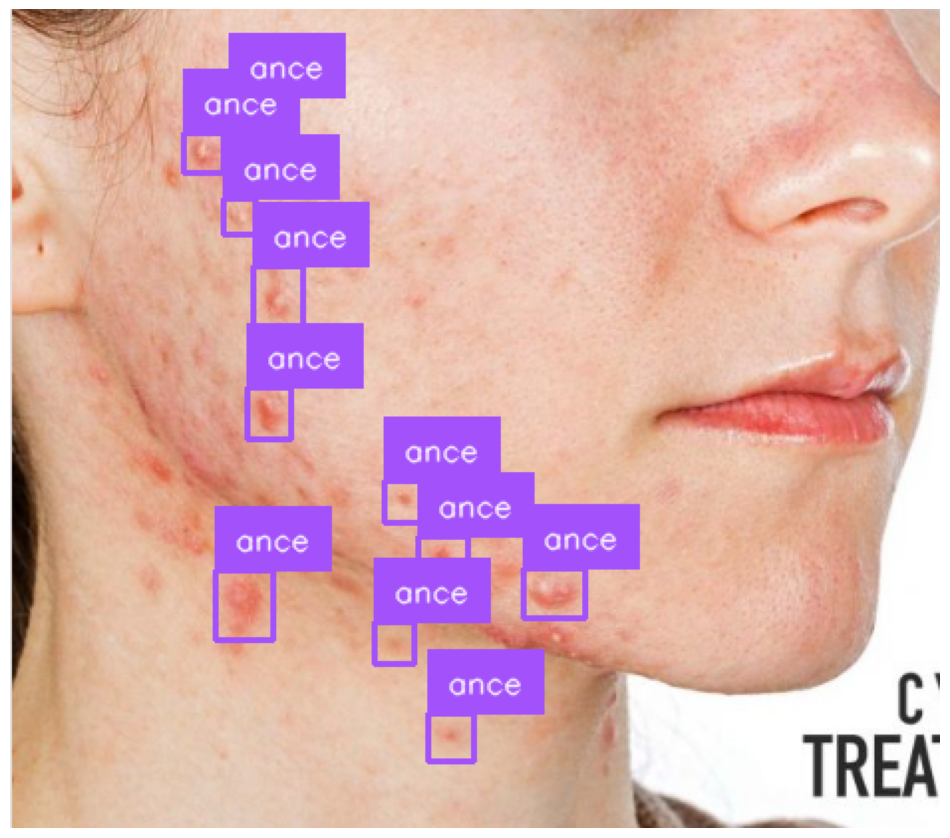

In [13]:
from inference import get_model
import supervision as sv
import cv2

# define the image url to use for inference
image_file = "C:/Users/parth/Downloads/66.png"
image = cv2.imread(image_file)

if image is None:
    print("Error loading image, please check the file path.")

# load a pre-trained yolov8n model with the new id
model = get_model(model_id="acne-yolo/1")
print("Model loaded:", model)

# run inference on our chosen image with custom thresholds
results = model.infer(image, conf_thres=0, iou_thres=0.5)[0]
print("Inference results:", results)

# load the results into the supervision Detections API
detections = sv.Detections.from_inference(results)
print("Detections:", detections)

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Save the image to inspect it
cv2.imwrite('annotated_output.png', annotated_image)

# display the image
sv.plot_image(annotated_image)


In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the pre-trained model
model = tf.keras.models.load_model('jaundice.keras')

In [23]:



# Load the image from the specified path
image_path = r'C:\byteCraft\ByteCraft\output1.png'
frame = cv2.imread(image_path)

# Check if the image was loaded successfully
if frame is None:
    print("Error: Could not load image.")
else:
    # Preprocess the image
    img = cv2.resize(frame, (224, 224))  # Resize to the input size of the model
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    
    # Make predictions
    predictions = model.predict(img)
    print(predictions[0][0])
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
0.9892195


In [ ]:
res = ""
resfin = []
question = "how did heera drown in debt"
for segment in segments:
  messages = [
    {
      "role": "user", "content":'''I will provide you with a question, and some text.
       Your job is to tell me if the question that I provided is relevant to the given text or is incoherent. Also if you find it relevant can u give the part of the text where you find its resemblance''',
    },
    {
      "role": "assistant", "content":"Sure, please provide me with the text and the question."
    },

    {
      "role": "user", "content":"""The text is demarkated by triple backticks:होरी एक गरीब किसान था, जो मुश्किल से गुजारा कर पा रहा था। अपनी कठिनाइयों के बावजूद, वह एक गाय खरीदने का सपना देखता था, जो गाँव में समृद्धि का प्रतीक थी।.
       The theme is demarkated by double backticks:`होरी गाय क्यों खरीदना चाहता था?`.""",
    },

    {"role":"assistant","content": "Yes, this question is relevant to this text."
    },
    {
      "role":"user","content": f'''The text is demarkated by triple backticks:{segment}. 
                                   The question is demarkated by double backticks:`{question}`.''',
    }
  ] 

  encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

  model_inputs = encodeds.to(device)
  model.to(device)

  generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
  decoded = tokenizer.batch_decode(generated_ids)
  res = decoded[0]
  
  last_inst_index = res.rfind('[/INST]')
  if last_inst_index != -1:
      res = res[last_inst_index + len('[/INST]'):]
    
    
  # question_mark_index = res.find('?')
  # if question_mark_index != -1:
  #     res = res[:question_mark_index + 1]  
  words_notexist = ['incoherent', 'irrelevant', 'not relevant', 'not coherent', 'does not make sense', 'doesnt make sense', 'not related', 'not coherent', 'not relevant']
  if all(word not in res.strip() for word in words_notexist):
       resfin.append(res)
       break
print(resfin)